In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
# import my implementation of the toolkit
import toolkit as tk
# import my implementation of the decision tree
from decisionTree import DecisionTreeClassifier, DecisionTreeRegressor
import decisionTree

In [2]:
# Abalone
abalone_names = ["sex", "length", "diameter", "height", "whole weight", "shucked weight", "viscera weight", "shell weight", "rings"]
abalone = tk.load_data("../classification_datasets/abalone.data", names=abalone_names)

# Breast cancer wisconsin
breast_cancer_names = ['sample_code', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'motoses', 'class']
breast_cancer = tk.load_data("../classification_datasets/breast-cancer-wisconsin.data", names=breast_cancer_names, index_col=0)

# breast cancer: missing value denoted by ?
tk.handle_missing_values(breast_cancer)

# Car
# arribute "class" is added for data loading purposes
car_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'] 
car = tk.load_data("../classification_datasets/car.data", names=car_names)

# Forest Fires
# forestfires has header
forestfires = tk.load_data("../classification_datasets/forestfires.data", header=0)

# house votes
house__votes_names = ['class', 'handicapped', 'water_project_cost_sharing', 'adoption_of_the_budget_resolution', 'physician_fee_freeze', 'el_salvador_aid', 'religious_groups_in_schools', 'anti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missile', 'immigration', 'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue', 'crime', 'duty_free_exports', 'export_administration_act_south_africa'] 
house_votes = tk.load_data("../classification_datasets/house-votes-84.data", names=house__votes_names)

# Machine
machine_names = ['vendor', 'model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'] 
machine = tk.load_data("../classification_datasets/machine.data", names=machine_names)

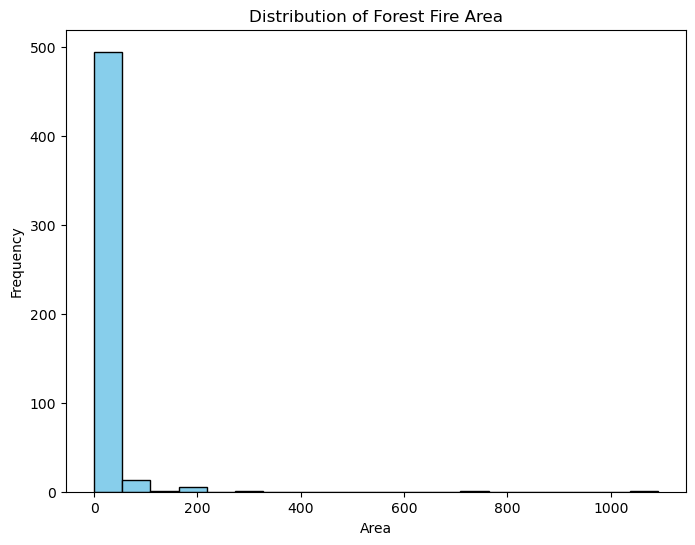

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(forestfires['area'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Forest Fire Area")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show()

# PA 3 Demo

In [3]:
# function for printing the classification tree
def print_tree_classification(tree, depth=0):
    # Recursively traverse and print the tree structure
    if isinstance(tree, dict):
        for feature, subtree in tree['children'].items():
            print('  ' * depth + f'Feature {tree["feature_index"]} = {feature}')
            print_tree_classification(subtree, depth + 1)
    else:
        print('  ' * depth + str(tree))

In [4]:
def print_tree_regression(tree, indent=" "):        
    if isinstance(tree, dict):
        print("X_"+str(tree["feature_index"]), "<=", tree["threshold"], "?", tree["mse"])
        print("%sleft:" % (indent), end="")
        print_tree_regression(tree["left"], indent + indent)
        print("%sright:" % (indent), end="")
        print_tree_regression(tree["right"], indent + indent)
    else:
        print(tree)

In [5]:
# classification data
house_votes_target = house_votes['class'].to_numpy()
house_votes_data = house_votes.drop(columns=['class']).to_numpy()

# regression data
forestfires_target = forestfires['area'].to_numpy()
forestfires_data = forestfires.drop(columns=['area']).to_numpy()

## Provide sample outputs from one test set on one fold for a classification tree and a regression tree.

In [6]:
K=1
# classification - house votes
prune = [True, False]
model = decisionTree.DecisionTreeClassifier()
tk.k_2_cv(house_votes_data, house_votes_target, K, prune, model, classification=True)

X_train size:  347
X_valid size:  88
y_train size:  347
y_valid size:  88
Round 0.1 of hyperparameter choosing.
train size: 137. test size: 88
Performance of corresponding hyperparams: [0.9545454545454546, 0.9431818181818182]
Round 0.2 of hyperparameter choosing.
train size: 138. test size: 88
Performance of corresponding hyperparams: [0.9204545454545454, 0.8977272727272727]
The average performance is: [0.9375     0.92045455]
The best hyperparams setting is: [True]
Round 0.1 performance testing of best hyperparameter setting.
train size: 173. test size: 174
Performance: 0.9597701149425287
Round 0.2 performance testing of best hyperparameter setting.
train size: 174. test size: 173
Performance: 0.953757225433526
The average performance is: 0.9567636701880273


(True, 0.9567636701880273)

In [7]:
# regression - forestfires
prune = [True, False]
model = decisionTree.DecisionTreeRegressor(max_depth=10)
tk.k_2_cv(forestfires_data, forestfires_target, K, prune, model, classification=False)

X_train size:  413
X_valid size:  104
y_train size:  413
y_valid size:  104
Round 0.1 of hyperparameter choosing.
train size: 164. test size: 104
Performance of corresponding hyperparams: [22.12322344322344, 26.790042067307695]
Round 0.2 of hyperparameter choosing.
train size: 165. test size: 104
Performance of corresponding hyperparams: [25.80591463414634, 26.679835260892954]
The average performance is: [23.96456904 26.73493866]
The best hyperparams setting is: [True]
Round 0.1 performance testing of best hyperparameter setting.
train size: 206. test size: 207
Performance: 10.120245767084095
Round 0.2 performance testing of best hyperparameter setting.
train size: 207. test size: 206
Performance: 14.62811799850635
The average performance is: 12.374181882795222


(True, 12.374181882795222)

## Show a sample classification tree without pruning and with pruning.

In [8]:
# split for pruning
X_1, X_2, y_1, y_2 = tk.train_test_split(house_votes_data, house_votes_target, split_percentage=0.8, classification=True)

house_votes_tree = DecisionTreeClassifier()
house_votes_tree.fit(X_1, y_1)

In [9]:
# tree without pruning
print_tree_classification(house_votes_tree.tree)

Feature 3 = ?
  Feature 11 = ?
    democrat
  Feature 11 = n
    democrat
  Feature 11 = y
    republican
Feature 3 = n
  Feature 2 = ?
    democrat
  Feature 2 = n
    Feature 5 = ?
      democrat
    Feature 5 = n
      Feature 14 = n
        republican
      Feature 14 = y
        democrat
    Feature 5 = y
      democrat
  Feature 2 = y
    democrat
Feature 3 = y
  Feature 10 = ?
    republican
  Feature 10 = n
    Feature 14 = ?
      republican
    Feature 14 = n
      Feature 2 = n
        republican
      Feature 2 = y
        Feature 15 = ?
          Feature 0 = n
            democrat
          Feature 0 = y
            republican
        Feature 15 = y
          republican
    Feature 14 = y
      Feature 9 = n
        Feature 6 = n
          Feature 11 = n
            democrat
          Feature 11 = y
            republican
        Feature 6 = y
          republican
      Feature 9 = y
        republican
  Feature 10 = y
    Feature 8 = n
      Feature 2 = n
        Feature 

In [10]:
house_votes_tree.reduced_error_prune_tree(X_2, y_2)

In [11]:
print_tree_classification(house_votes_tree.tree)


Feature 3 = ?
  republican
Feature 3 = n
  democrat
Feature 3 = y
  republican


## Show a sample regression tree without pruning and with pruning.

In [12]:
#Initialize and fit the decision tree regressor
X_1, X_2, y_1, y_2 = tk.train_test_split(forestfires_data, forestfires_target, split_percentage=0.8, classification=False)

forests_tree = DecisionTreeRegressor(max_depth=10)
forests_tree.fit(X_1, y_1)
print_tree_regression(forests_tree.tree)

X_4 <= 50.4 ? 2193.150587576441
 left:0.0
 right:X_4 <= 63.5 ? 2203.2338009983196
  left:0.0
  right:X_4 <= 69.0 ? 2213.4097792657963
    left:0.0
    right:X_5 <= 3.0 ? 2223.679802386221
        left:0.0
        right:X_9 <= 90 ? 2234.0451738955353
                left:X_10 <= 8.9 ? 2244.908601930959
                                left:X_4 <= 96.1 ? 2257.4250544658953
                                                                left:X_4 <= 75.1 ? 2269.1744224075087
                                                                                                                                left:3.7649999999999997
                                                                                                                                right:X_7 <= 20.0 ? 2282.7425334522204
                                                                                                                                                                                                              

In [13]:
forests_tree.reduced_error_prune_tree(X_2, y_2)
print_tree_regression(forests_tree.tree)

18.72125


## Demonstrate the calculation of information gain, gain ratio, and mean squared error.

In [14]:
# information gain
decisionTree.calculate_information_gain(house_votes_data, house_votes_target, 0)

0.12607312231686563

In [15]:
# gain ratio
decisionTree.calculate_gain_ratio(house_votes_data, house_votes_target, 0)

0.11009613157866842

In [16]:
left_y = y_1
right_y = y_2
# mean squared error
decisionTree.calculate_mse(left_y, right_y)

13574.774744856715

## Demonstrate a decision being made to prune a subtree.

In [17]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([2, 4, 3, 7, 5, 9, 8, 10, 12, 11])

In [18]:
#Initialize and fit the decision tree regressor
regr_tree = DecisionTreeRegressor()
regr_tree.fit(X, y)
sub_tree = regr_tree.tree["left"]
print_tree_regression(sub_tree)

X_0 <= 3 ? 1.6666666666666665
 left:3.0
 right:6.0


In [19]:
X = np.array([[3]])
y = np.array([4.5])
decisionTree.whether_to_prune(X, y, sub_tree)

yes


## Demonstrate an example traversing a classification tree and a class label being assigned at the leaf.

In [20]:
house_votes_tree = DecisionTreeClassifier()
house_votes_tree.fit(house_votes_data, house_votes_target)
print_tree_classification(house_votes_tree.tree)

Feature 3 = ?
  Feature 11 = ?
    Feature 8 = ?
      republican
    Feature 8 = n
      democrat
    Feature 8 = y
      democrat
  Feature 11 = n
    democrat
  Feature 11 = y
    republican
Feature 3 = n
  Feature 2 = ?
    democrat
  Feature 2 = n
    Feature 11 = ?
      republican
    Feature 11 = n
      Feature 10 = n
        Feature 5 = n
          Feature 13 = n
            democrat
          Feature 13 = y
            republican
        Feature 5 = y
          democrat
      Feature 10 = y
        democrat
    Feature 11 = y
      democrat
  Feature 2 = y
    democrat
Feature 3 = y
  Feature 10 = ?
    republican
  Feature 10 = n
    Feature 14 = ?
      republican
    Feature 14 = n
      Feature 2 = n
        republican
      Feature 2 = y
        Feature 15 = ?
          Feature 0 = n
            democrat
          Feature 0 = y
            republican
        Feature 15 = y
          republican
    Feature 14 = y
      Feature 9 = n
        Feature 6 = n
          Featur

In [21]:
# Make predictions
newdata = np.array([['n', 'y', 'n', 'y', 'y', 'y', 'n', 'n', 'n', 'y', '?', 'y', 'y', 'y', 'n', 'y']])
house_votes_tree.predict(newdata)

array(['republican'], dtype='<U10')

## Demonstrate an example traversing a regression tree and a prediction being made at the leaf.

In [22]:
#Initialize and fit the decision tree regressor
forests_tree = DecisionTreeRegressor(max_depth=10)
forests_tree.fit(forestfires_data, forestfires_target)
print_tree_regression(forests_tree.tree)

X_4 <= 50.4 ? 4059.2878373154863
 left:0.0
 right:X_6 <= 9.3 ? 4074.4625039096536
  left:0.0
  right:X_7 <= 0.7 ? 4089.7508386181107
    left:0.0
    right:X_9 <= 96 ? 4105.154120796971
        left:X_7 <= 22.6 ? 4120.689602388746
                left:X_7 <= 20.3 ? 4137.490084901577
                                left:X_4 <= 96.1 ? 4154.224079017841
                                                                left:X_5 <= 3.2 ? 4173.721856203362
                                                                                                                                left:2.31
                                                                                                                                right:X_5 <= 4.4 ? 4196.902358283334
                                                                                                                                                                                                                                                    

In [23]:
# Make predictions
new_data = [[7, 5, 'mar', 'fri', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0]]
predictions = forests_tree.predict(new_data)
predictions

array([13.31665323])

# Output for Paper

In [28]:
K=5
hyperparam = [False, True]

## Classification Data

In [31]:
model=DecisionTreeClassifier()

breast cancer

In [32]:
breast_cancer_label = breast_cancer['class'].to_numpy()
breast_cancer_data = breast_cancer.drop(columns=['class']).to_numpy()
tk.k_2_cv(breast_cancer_data, breast_cancer_label, K, hyperparam, model, classification=True)

X_train size:  558
X_valid size:  141
y_train size:  558
y_valid size:  141
Round 0.1 of hyperparameter choosing.
train size: 222. test size: 141
Performance of corresponding hyperparams: [0.950354609929078, 0.9574468085106383]
Round 0.2 of hyperparameter choosing.
train size: 222. test size: 141
Performance of corresponding hyperparams: [0.9078014184397163, 0.8581560283687943]
Round 1.1 of hyperparameter choosing.
train size: 222. test size: 141
Performance of corresponding hyperparams: [0.9290780141843972, 0.900709219858156]
Round 1.2 of hyperparameter choosing.
train size: 222. test size: 141
Performance of corresponding hyperparams: [0.8865248226950354, 0.9219858156028369]
Round 2.1 of hyperparameter choosing.
train size: 222. test size: 141
Performance of corresponding hyperparams: [0.9290780141843972, 0.950354609929078]
Round 2.2 of hyperparameter choosing.
train size: 222. test size: 141
Performance of corresponding hyperparams: [0.9290780141843972, 0.9574468085106383]
Round 3.1

(False, 0.9218637992831542)

car

In [33]:
car_target = car['class'].to_numpy()
car_data = car.drop(columns=['class']).to_numpy()
tk.k_2_cv(car_data, car_target, K, hyperparam, model, classification=True)

X_train size:  1382
X_valid size:  346
y_train size:  1382
y_valid size:  346
Round 0.1 of hyperparameter choosing.
train size: 550. test size: 346
Performance of corresponding hyperparams: [0.8757225433526011, 0.846820809248555]
Round 0.2 of hyperparameter choosing.
train size: 552. test size: 346
Performance of corresponding hyperparams: [0.9104046242774566, 0.8179190751445087]
Round 1.1 of hyperparameter choosing.
train size: 550. test size: 346
Performance of corresponding hyperparams: [0.8728323699421965, 0.8179190751445087]
Round 1.2 of hyperparameter choosing.
train size: 552. test size: 346
Performance of corresponding hyperparams: [0.8786127167630058, 0.8641618497109826]
Round 2.1 of hyperparameter choosing.
train size: 550. test size: 346
Performance of corresponding hyperparams: [0.8757225433526011, 0.8294797687861272]
Round 2.2 of hyperparameter choosing.
train size: 552. test size: 346
Performance of corresponding hyperparams: [0.8786127167630058, 0.8121387283236994]
Round

(False, 0.8467454134204575)

house votes

In [35]:
house_votes_target = house_votes['class'].to_numpy()
house_votes_data = house_votes.drop(columns=['class']).to_numpy()
tk.k_2_cv(house_votes_data, house_votes_target, K, hyperparam, model, classification=True)

X_train size:  347
X_valid size:  88
y_train size:  347
y_valid size:  88
Round 0.1 of hyperparameter choosing.
train size: 137. test size: 88
Performance of corresponding hyperparams: [0.9318181818181818, 0.9431818181818182]
Round 0.2 of hyperparameter choosing.
train size: 138. test size: 88
Performance of corresponding hyperparams: [0.9431818181818182, 0.9431818181818182]
Round 1.1 of hyperparameter choosing.
train size: 137. test size: 88
Performance of corresponding hyperparams: [0.9090909090909091, 0.8863636363636364]
Round 1.2 of hyperparameter choosing.
train size: 138. test size: 88
Performance of corresponding hyperparams: [0.9204545454545454, 0.9431818181818182]
Round 2.1 of hyperparameter choosing.
train size: 137. test size: 88
Performance of corresponding hyperparams: [0.9090909090909091, 0.9431818181818182]
Round 2.2 of hyperparameter choosing.
train size: 138. test size: 88
Performance of corresponding hyperparams: [0.9204545454545454, 0.9431818181818182]
Round 3.1 of h

(True, 0.9550428542953957)

## Regression Data

In [41]:
model=DecisionTreeRegressor()

Abalone

In [38]:
abalone_target = abalone['rings'].to_numpy()
abalone_data = abalone.drop(columns=['rings']).to_numpy()
tk.k_2_cv(abalone_data, abalone_target, K, hyperparam, model, classification=False)

X_train size:  3341
X_valid size:  836
y_train size:  3341
y_valid size:  836
Round 0.1 of hyperparameter choosing.
train size: 1336. test size: 836
Performance of corresponding hyperparams: [2.123006379585327, 2.1009654818865346]
Round 0.2 of hyperparameter choosing.
train size: 1336. test size: 836
Performance of corresponding hyperparams: [2.210526315789474, 2.1068381180223286]
Round 1.1 of hyperparameter choosing.
train size: 1336. test size: 836
Performance of corresponding hyperparams: [2.255781499202552, 2.1230495315423545]
Round 1.2 of hyperparameter choosing.
train size: 1336. test size: 836
Performance of corresponding hyperparams: [2.2450159489633172, 2.224732285258601]
Round 2.1 of hyperparameter choosing.
train size: 1336. test size: 836
Performance of corresponding hyperparams: [2.209529505582137, 2.0914484638168847]
Round 2.2 of hyperparameter choosing.
train size: 1336. test size: 836
Performance of corresponding hyperparams: [2.1965709728867626, 2.256222106067307]
Roun

(True, 1.954681782747942)

In [42]:
forestfires_target = forestfires['area'].to_numpy()
forestfires_data = forestfires.drop(columns=['area']).to_numpy()
tk.k_2_cv(forestfires_data, forestfires_target, K, hyperparam, model, classification=False)

X_train size:  413
X_valid size:  104
y_train size:  413
y_valid size:  104
Round 0.1 of hyperparameter choosing.
train size: 164. test size: 104
Performance of corresponding hyperparams: [20.423477564102562, 8.118365384615384]
Round 0.2 of hyperparameter choosing.
train size: 165. test size: 104
Performance of corresponding hyperparams: [13.287483974358974, 12.449921558704451]
Round 1.1 of hyperparameter choosing.
train size: 164. test size: 104
Performance of corresponding hyperparams: [12.624455128205131, 9.070363247863249]
Round 1.2 of hyperparameter choosing.
train size: 165. test size: 104
Performance of corresponding hyperparams: [21.893541666666668, 25.410977047146396]
Round 2.1 of hyperparameter choosing.
train size: 164. test size: 104
Performance of corresponding hyperparams: [11.882708333333333, 12.664087771203155]
Round 2.2 of hyperparameter choosing.
train size: 165. test size: 104
Performance of corresponding hyperparams: [11.688541666666664, 11.017960090984284]
Round 3.

(True, 21.317097948302752)

In [43]:
machine_target = machine['PRP'].to_numpy()
machine_data = machine.drop(columns=['PRP']).to_numpy()
tk.k_2_cv(machine_data, machine_target, K, hyperparam, model, classification=False)

X_train size:  167
X_valid size:  42
y_train size:  167
y_valid size:  42
Round 0.1 of hyperparameter choosing.
train size: 66. test size: 42
Performance of corresponding hyperparams: [37.019841269841265, 40.92460317460318]
Round 0.2 of hyperparameter choosing.
train size: 67. test size: 42
Performance of corresponding hyperparams: [42.876984126984134, 45.769841269841265]
Round 1.1 of hyperparameter choosing.
train size: 66. test size: 42
Performance of corresponding hyperparams: [48.79761904761905, 145.71428571428572]
Round 1.2 of hyperparameter choosing.
train size: 67. test size: 42
Performance of corresponding hyperparams: [37.817460317460316, 44.522222222222226]
Round 2.1 of hyperparameter choosing.
train size: 66. test size: 42
Performance of corresponding hyperparams: [38.21428571428572, 45.904761904761905]
Round 2.2 of hyperparameter choosing.
train size: 67. test size: 42
Performance of corresponding hyperparams: [49.25, 76.1547619047619]
Round 3.1 of hyperparameter choosing.


(False, 49.69225712373303)